In [1]:
import matplotlib.pyplot as plt

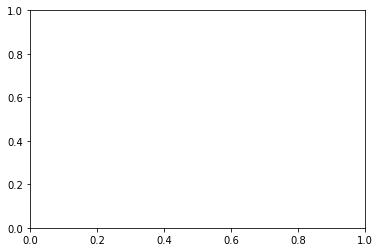

In [2]:
# Create the graphic elements that will constitute our data visualization.
fig, ax = plt.subplots()

In [3]:
trial = [1, 2, 3, 4, 5, 6]
first_block = [50, 51.7, 58.8, 68.8, 71.9, 77.9]
second_block = [50, 78.8, 83, 84.2, 90.1, 92.7]
third_block = [50, 96.9, 97.8, 98.1, 98.8, 98.7]

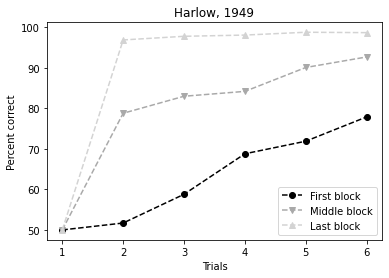

In [4]:
#Customizing graphs
fig, ax = plt.subplots(1, 1)

ax.plot(trial, first_block, color = "black", marker='o', linestyle='--', label="First block")
ax.plot(trial, second_block, color = "darkgray", marker='v', linestyle='--', label="Middle block")
ax.plot(trial, third_block, color = "lightgray", marker='^', linestyle='--', label="Last block")
ax.legend()

ax.set_xlabel("Trials")
ax.set_ylabel("Percent correct")
ax.legend()
title = ax.set_title("Harlow, 1949")

plt.show()

In [9]:
import pandas as pd

In [10]:
#Read in datafile and drop missing data
df = pd.read_csv("/Users/mickey.rice/Desktop/visualization.csv",
               index_col = 0
                )
df = df.dropna()
df.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,age_less_than_10,tractID,nodeID,fa
subjectID,,,,,,,,,,
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,0,0.199144
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,1,0.253789
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,2,0.300039
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,3,0.330740
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,4,0.357632


In [11]:
#Divide the sample into two groups: participants over the age of 10 and participants under the age of 10.
age_groups = df.groupby(["age_less_than_10", "tractID", "nodeID"])
younger_fa = age_groups.mean(numeric_only = True).loc[True, "fa"]
older_fa   = age_groups.mean(numeric_only = True).loc[False, "fa"]
tracts     = df["tractID"].unique()

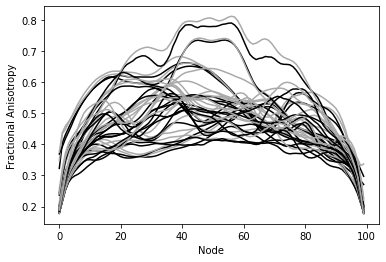

In [12]:
#Create a graph that  iterates over the names of the pathways and, in each iteration, adds the data for one of the tracts into the plot.
fig, ax = plt.subplots(1, 1)
for tract in tracts:
    ax.plot(younger_fa[tract], color="black")
    ax.plot(older_fa[tract], color="darkgray")
ax.set_xlabel("Node")
label = ax.set_ylabel("Fractional Anisotropy")

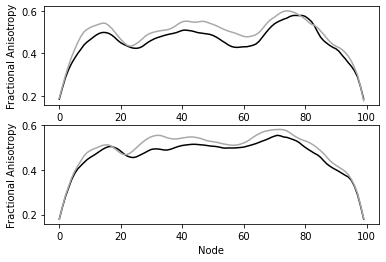

In [13]:
#Separate the plots so that the data from each tract has its own set of axes
fig, [ax1, ax2] = plt.subplots(2)
ax1.plot(younger_fa["Right Arcuate"], color = "black")
ax1.plot(older_fa["Right Arcuate"], color = "darkgray")
ax2.plot(younger_fa["Left Arcuate"], color = "black")
ax2.plot(older_fa["Left Arcuate"], color = "darkgray")
ax2.set_ylabel("Fractional Anisotropy")
ax1.set_ylabel("Fractional Anisotropy")
label = ax2.set_xlabel("Node")

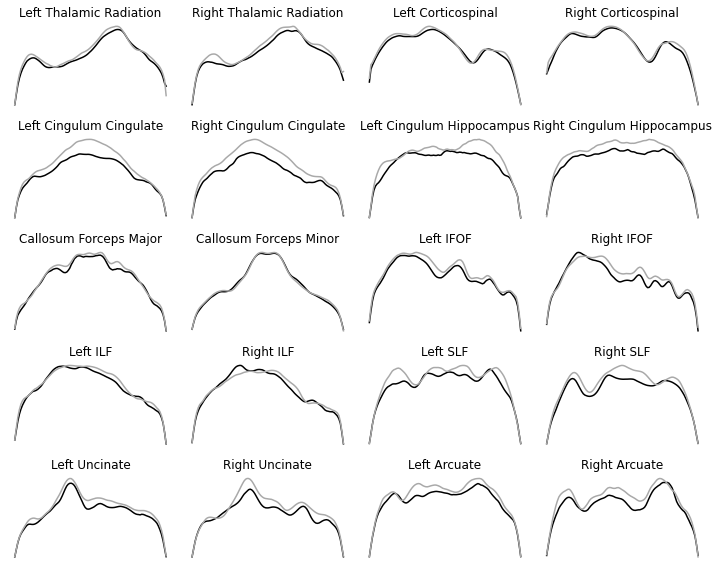

In [14]:
#More subplots
fig, ax = plt.subplots(5, 4)
for tract_idx in range(20):
    pathway = tracts[tract_idx]
    ax.flat[tract_idx].plot(younger_fa[pathway], color="black")
    ax.flat[tract_idx].plot(older_fa[pathway], color="darkgray")
    ax.flat[tract_idx].set_title(pathway)
    ax.flat[tract_idx].axis("off")

fig.set_tight_layout("tight")
fig.set_size_inches([10, 8])

In [15]:
# Exercise: The Axes objects have set_ylim() and set_xlim() methods, which set the limits of each of the dimensions of the plot. They take a list of two values for the minimal value of the range. To facilitate comparisons between tracts, use the set_ylim method to set the range of the FA values in each of the plots so that they are the same in all of the plots. To make sure that the code you write provides the appropriate range in all of the subplots, you will need to start by figuring out what are the maximal and minimal values of FA in the entire dataset.

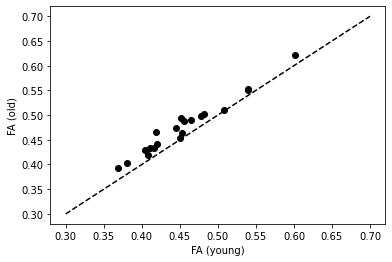

In [16]:
#Scatter plots
fig, ax = plt.subplots()

ax.scatter(younger_fa.groupby("tractID").mean(),
           older_fa.groupby("tractID").mean(), 
           color = "black")

ax.plot([0.3, 0.7], [0.3, 0.7], color = "black", linestyle='--')
ax.set_xlabel("FA (young)")
label = ax.set_ylabel("FA (old)")

In [20]:
#Statistical visualization using seaborn

import numpy as np

import seaborn as sns

subjects = df.drop_duplicates(["Age", "Gender", "Handedness", "IQ", "IQ_Matrix", "IQ_Vocab"])

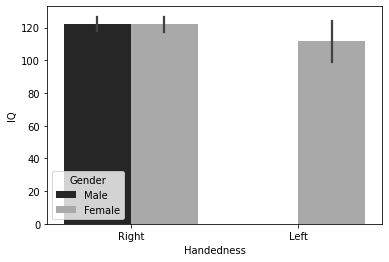

In [21]:
#Draw comparisons of IQ between people with different handedness and gender.
b = sns.barplot(data=subjects, x="Handedness", y="IQ", hue="Gender", palette = "dark:darkgray")

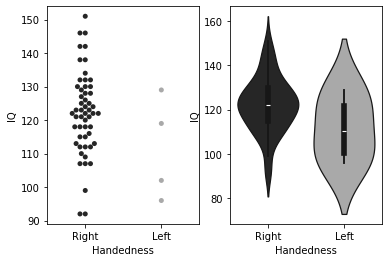

In [22]:
#Violin plot
fig, ax = plt.subplots(1, 2)
g = sns.swarmplot(data=subjects, x="Handedness", y="IQ", hue = "Handedness", ax=ax[0], palette = "dark:darkgray")
g = sns.violinplot(data=subjects, x="Handedness", y="IQ", hue = "Handedness", ax=ax[1], palette = "dark:darkgray")

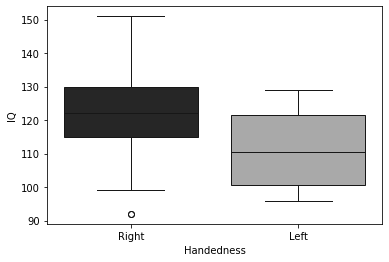

In [24]:
#Box plot
g = sns.boxplot(data=subjects, x="Handedness", y="IQ", hue="Handedness", palette="dark:darkgray", legend=False)

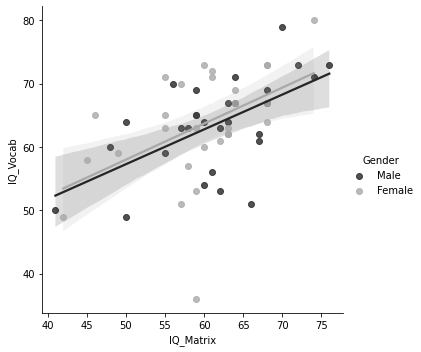

In [25]:
#Linear model
g = sns.lmplot(data=subjects, x="IQ_Matrix", y="IQ_Vocab", hue="Gender", palette = "dark:darkgray")